# Initial database Processing
Use this Notebook for initial processing of the database - data cleaning, integration, reduction.

Checklist:
- Remove patients without ECG signal from data description file (done)
- Remove anomalies from ECG signals
- Upload large ECG data
- Upload other databases

For more information on the pyECG module: 
https://www.researchgate.net/publication/331012096_PyECG_A_software_tool_for_the_analysis_of_the_QT_interval_in_the_electrocardiogram

https://pypi.org/project/pyECG/

In [1]:
# Importing packages
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyecg import ECGRecord

## WFDB file formats
### Header files
The record line
E.g. S0250ECG 8 1000 1256376 15:26:59 2006
- Record name: S0250ECG
- Number of signals: 8
- Sampling frequency (in samples per second per signal): 1000
- Number of samples per signal: 1256376
- Base time (time of day corresponding with the beginning of the record): 15:26:59
- Base date: 2006 (this is in the wrong format in the database, a quick fix is just removing it from the header but this may be annoying)

Signal specification lines
Each of the non-empty, non-comment lines following the record line represent 1 signal.
E.g. S0250ECG.dat 16 1(0)/uV 16 0 -88 25184 0 ecg_0
- File name (of where the signal is stored): S0250ECG.dat
- Format: 16-bit-amplitudes (see documentation on signal files)
- ADC gain: 1 (uV)
- Baseline: 0 (uV)
- ADC resolution (bits): 16
- ADC zero: 0
- initial value (of signal): -88
- checksum (used to verify that the file hasn't been corrupted): 25184
- block size: 0
- Description: 'ecg_0'

For more information on header files: https://archive.physionet.org/physiotools/wag/header-5.htm

### Signal files...
Info can be found here: https://archive.physionet.org/physiotools/wag/signal-5.htm

## Initial setup
### Getting a table of patients with associated ECG readings 

In [ ]:
# List of patient IDs with ECG readings 
pat_list = []
with open("database/data_description/GE-75_files_per_subject.csv") as file:
    csv_reader = csv.reader(file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0: #Finding the ECG column
            ECG_index = row.index('ECG')
            line_count = 1
        else:
            if row[ECG_index] == '1': pat_list.append(row[0]) 

# Importing all other patient variables into a dataframe
df_csv = pd.read_csv('./database/data_description/GE-75_data_summary_table.csv', encoding = 'latin-1')
df_csv = df_csv.loc[df_csv['patient ID'].isin(pat_list)]
df_csv.set_index('patient ID', inplace=True)

# 6 Controls and 45 Diabetics from the 88 initial total
# Now saving this as a new file for future use
df_csv.to_csv('./database/data_description/ECG_data_summary_table.csv')

In [3]:
df_csv

study    Group  template  Diabetes Duration HTN or not  HTN2  age  \
patient ID                                                                     
S0250       GE75       DM       NaN                7.0        NaN   NaN   50   
S0256       GE75       DM  Modified               23.0        ntn   NaN   65   
s0273       GE75       DM  Modified               16.0        HTN   NaN   68   
s0282       GE75       DM       NaN                1.0        NaN   NaN   62   
s0283       GE75  CONTROL  Modified                0.0        ntn   NaN   83   
s0287       GE75       DM  Modified               18.0        HTN   NaN   73   
s0288       GE75       DM  Modified                2.0        HTN   NaN   73   
s0292       GE75       DM  Modified                5.0        ntn   NaN   66   
s0296       GE75       DM  Modified                9.0        HTN   NaN   71   
S0300       GE75       DM  Modified               10.0        ntn   NaN   67   
s0301       GE75       DM  Modified               21.0        HTN   NaN   65   
s0304       GE75       DM  Modified               21.0        ntn   NaN   74   
s0308       GE75       DM  Modified               10.0        ntn   NaN   59   
s0310       GE75       DM  Modified                7.0        ntn   NaN   78   
S0312       GE75       DM  Modified                6.0        ntn   NaN   74   
s0314       GE75       DM  Modified                2.0        ntn   NaN   64   
s0315       GE75       DM  Modified                7.0        ntn   NaN   52   
s0316       GE75       DM  Modified               12.0        ntn   NaN   52   
s0317       GE75       DM  Modified               17.0        HTN   NaN   61   
s0318       GE75       DM  Modified                4.0        ntn   NaN   51   
S0326       GE75       DM  Modified               37.0        ntn   NaN   73   
s0327       GE75       DM  Modified                5.0        ntn   NaN   55   
s0339       GE75       DM  Modified               28.0        ntn   NaN   52   
s0342       GE75       DM  Modified                3.0        ntn   NaN   76   
s0349       GE75       DM  Modified               17.0        HTN   NaN   64   
s0365       GE75       DM       NaN                8.0        NaN   NaN   74   
s0366       GE75       DM  Modified                7.0        HTN   NaN   55   
s0368       GE75  CONTROL  Modified                0.0        ntn   NaN   58   
s0372       GE75       DM  Modified                3.0        ntn   NaN   77   
s0381       GE75       DM  Modified                3.0        ntn   NaN   62   
s0382       GE75       DM  Modified                2.0        ntn   NaN   77   
s0390       GE75       DM  Modified                2.0        ntn   NaN   51   
s0392       GE75       DM  Modified                3.0        HTN   NaN   74   
s0398       GE75       DM  Modified                1.0        HTN   NaN   66   
s0403       GE75       DM  Modified               12.0        HTN   NaN   67   
s0405       GE75       DM  Modified               20.0        HTN   NaN   80   
s0406       GE75       DM  Modified               10.0        HTN   NaN   73   
s0409       GE75       DM  Modified                4.0        ntn   NaN   62   
s0411       GE75  CONTROL  Modified                0.0        ntn   NaN   74   
s0416       GE75       DM  Modified                NaN        HTN   NaN   74   
s0420       GE75       DM  Modified                2.0        ntn   NaN   66   
s0423       GE75       DM  Modified                NaN        HTN   NaN   54   
s0424       GE75       DM  Modified                NaN        HTN   NaN   67   
s0426       GE75       DM  Modified                NaN        ntn   NaN   67   
s0427       GE75  CONTROL  Modified                NaN        ntn   NaN   67   
s0430       GE75       DM  Modified                3.0        HTN   NaN   62   
s0432       GE75       DM  Modified               10.0        ntn   NaN   70   
s0433       GE75       DM  Modified                9.0        ntn   NaN   64   
s0434      

## Visualising the data present 
### Loading ECG data into dataframe

In [2]:
path = "./database/ecgdata/" #Change the location of the file or folder.
files = sorted(os.listdir(path))
#files.pop(0)
dataset = []
lead_names = ['ecg_0','ecg_1']
times = [] # For looking at signal lengths, + time of day

df_ecg = pd.DataFrame (columns = dataset)

for file in files:
    if file.endswith('.hea'):
        #Reading and storing the data into a dataframe.
        hea_path = path + file #Change the location of the file or folder.
        record = ECGRecord.from_wfdb(hea_path)
        
        #Getting important info from the header
        f = open(hea_path, "r")
        f_line = f.readline().split()
        times.append([f_line[0], f_line[3], f_line[4]])
        
        #Using pyECG Library
        for lead in lead_names:
            signal = record.get_lead(lead)
            df_ecg[file + "/" + lead] = pd.Series(signal)
            
df_ecg

S0250ECG.hea/ecg_0  S0250ECG.hea/ecg_1  S0256ECG.hea/ecg_0  \
0                     -88.0              -483.0                21.0   
1                     -93.0              -496.0                21.0   
2                     -99.0              -509.0                20.0   
3                    -104.0              -520.0                21.0   
4                    -110.0              -533.0                19.0   
...                     ...                 ...                 ...   
1256371               340.0              -123.0               -21.0   
1256372               367.0              -151.0               -21.0   
1256373               388.0              -177.0               -20.0   
1256374               405.0              -201.0               -20.0   
1256375               421.0              -232.0               -21.0   

         S0256ECG.hea/ecg_1  S0273ECG.hea/ecg_0  S0273ECG.hea/ecg_1  \
0                    -130.0                0.07                0.19   
1                    -123.0                0.07                0.15   
2                    -114.0                0.06                0.12   
3                    -102.0                0.03                0.18   
4                     -92.0               -0.01                0.27   
...                     ...                 ...                 ...   
1256371              -107.0                0.23                0.13   
1256372              -112.0                0.25                0.00   
1256373              -113.0                0.28               -0.18   
1256374              -114.0                0.27               -0.27   
1256375              -116.0                0.23               -0.26   

         S0282ECG.hea/ecg_0  S0282ECG.hea/ecg_1  S0283ECG.hea/ecg_0  \
0                    -138.0              -119.0               508.0   
1                    -141.0              -130.0               510.0   
2                    -143.0              -141.0               515.0   
3                    -147.0              -153.0               523.0   
4                    -149.0              -164.0               526.0   
...                     ...                 ...                 ...   
1256371                 NaN                 NaN               -28.0   
1256372                 NaN                 NaN               -23.0   
1256373                 NaN                 NaN               -15.0   
1256374                 NaN                 NaN                -3.0   
1256375                 NaN                 NaN                12.0   

         S0283ECG.hea/ecg_1  ...  S0405ECG.hea/ecg_0  S0405ECG.hea/ecg_1  \
0                     301.0  ...              -215.0              -285.0   
1                     301.0  ...              -212.0              -288.0   
2                     303.0  ...              -212.0              -289.0   
3                     308.0  ...              -211.0              -290.0   
4                     311.0  ...              -207.0              -289.0   
...                     ...  ...                 ...                 ...   
1256371               324.0  ...               322.0              -423.0   
1256372               320.0  ...               323.0              -409.0   
1256373               321.0  ...               318.0              -394.0   
1256374               325.0  ...               314.0              -379.0   
1256375               327.0  ...               312.0              -367.0   

         S0406ECG.hea/ecg_0  S0406ECG.hea/ecg_1  S0409ECG.hea/ecg_0  \
0                    -972.0                64.0               -19.0   
1                    -970.0                54.0               -25.0   
2                    -966.0                43.0               -32.0   
3                    -961.0                33.0               -38.0   
4                    -957.0                25.0               -44.0   
...                     ...                 ...                 ...   
1256371                 NaN             

### Loading Large ECG data into dataFrame

In [95]:
path = "./database/ecgdata/large_ecg/" #Change the location of the file or folder.
files = sorted(os.listdir(path))

for file in files:
    if file.endswith('.hea'):
        #Reading and storing the data into a dataframe.
        hea_path = path + file #Change the location of the file or folder.
        

        record = ECGRecord.from_wfdb(hea_path)
        for lead in lead_names:
            time = record.time
            signal = record.get_lead(lead)
            database_ecg[file + "/" + lead] = pd.Series(signal)
database_ecg   

S0403ECG 8 1000 58338090 14:44:38 
S0403ECG.dat 16 1(0)/uV 16 0 1199 13953 0 ecg_0
S0403ECG.dat 16 1(0)/uV 16 0 22 60318 0 ecg_1
S0403ECG.dat 16 1(0)/uV 16 0 8908 45595 0 sensor_0
S0403ECG.dat 16 1(0)/uV 16 0 4687 29331 0 sensor_1
S0403ECG.dat 16 1(0)/uV 16 0 4 5775 0 emg_0
S0403ECG.dat 16 1(0)/uV 16 0 0 56393 0 emg_1
S0403ECG.dat 16 1(0)/uV 16 0 202 12802 0 accelerometer_0
S0403ECG.dat 16 1(0)/uV 16 0 53 28772 0 accelerometer_1



NameError: name 'database_ecg' is not defined

### Loading entire readings + Deleting wrongly formatted date 

In [ ]:
#Deleting the '2006' string to be able to read the data.
for file in files:
    if file.endswith('.hea'):
        for lead in lead_names:
            dataset.append(file + "/" + lead)
        fin = open(path + file,"rt") #Change the location of the file or folder.
        data_file = fin.read()
        # More efficient way of doing this would be to delete the last number in the top line of each file
        data_file = data_file.replace('2006','')
        data_file = data_file.replace('2007','')
        data_file = data_file.replace('2008','')
        fin = open(path + file,"wt") #Change the location of the file or folder.
        fin.write(data_file)
        fin.close()

### Some initial info

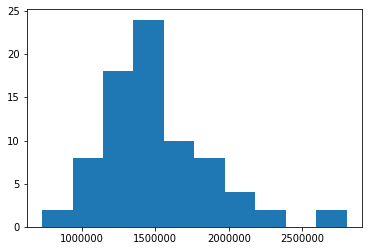

In [79]:
# Length of the readings
hist1 = plt.hist(times)

[-28.773781097378492, -26.850534394162256, -44.92027227517877, -45.959227969970776, 0.08516405916703115, 0.10196580482275888, 8.375916564570664, 9.73821940891013, 8.231846198908608, 10.157204531127624, 8.19238746999306, 10.765368806790324, 8.47129300238509, 10.097654828798966, 8.906765172209594, 10.459171458225882, 8.400428693321107, 10.154121855240788, 8.936548453647633, 10.69962893273988, 8.395898797373029, 10.020134253843743, 8.084797067120034, 10.195678682177947, 8.46218011168631, 10.218158417543792, 8.180188892497151, 10.07313495323056, 8.22412558024031, 10.13879204951384, 8.312614217399886, 9.962566142619725, 7.970316793827982, 9.816023179203578, 8.301657306411457, 9.969482861818436, 8.325955764834731, 10.094361082987895, 8.501039497729979, 10.331314033378543, 390.28240829178526, 15.514827567543474, 157.94848357498074, 231.25112147955707, -12.540919934736117, 10.326913388846636, 8.453053862856342, 9.919609257101378, 8.63031608372016, 10.146839799550452, 8.489243971266806, 10.1273

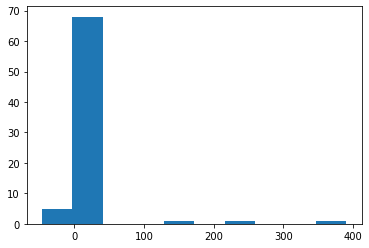

In [87]:
# Average amplitude
av_amp = []

for column in df_ecg:
    av_amp.append(sum(df_ecg[column].dropna())/len(df_ecg[column].dropna()))

del av_amp[-3]
del av_amp[-3]
print(av_amp)
hist2 = plt.hist(av_amp)

### Plotting all of the signals

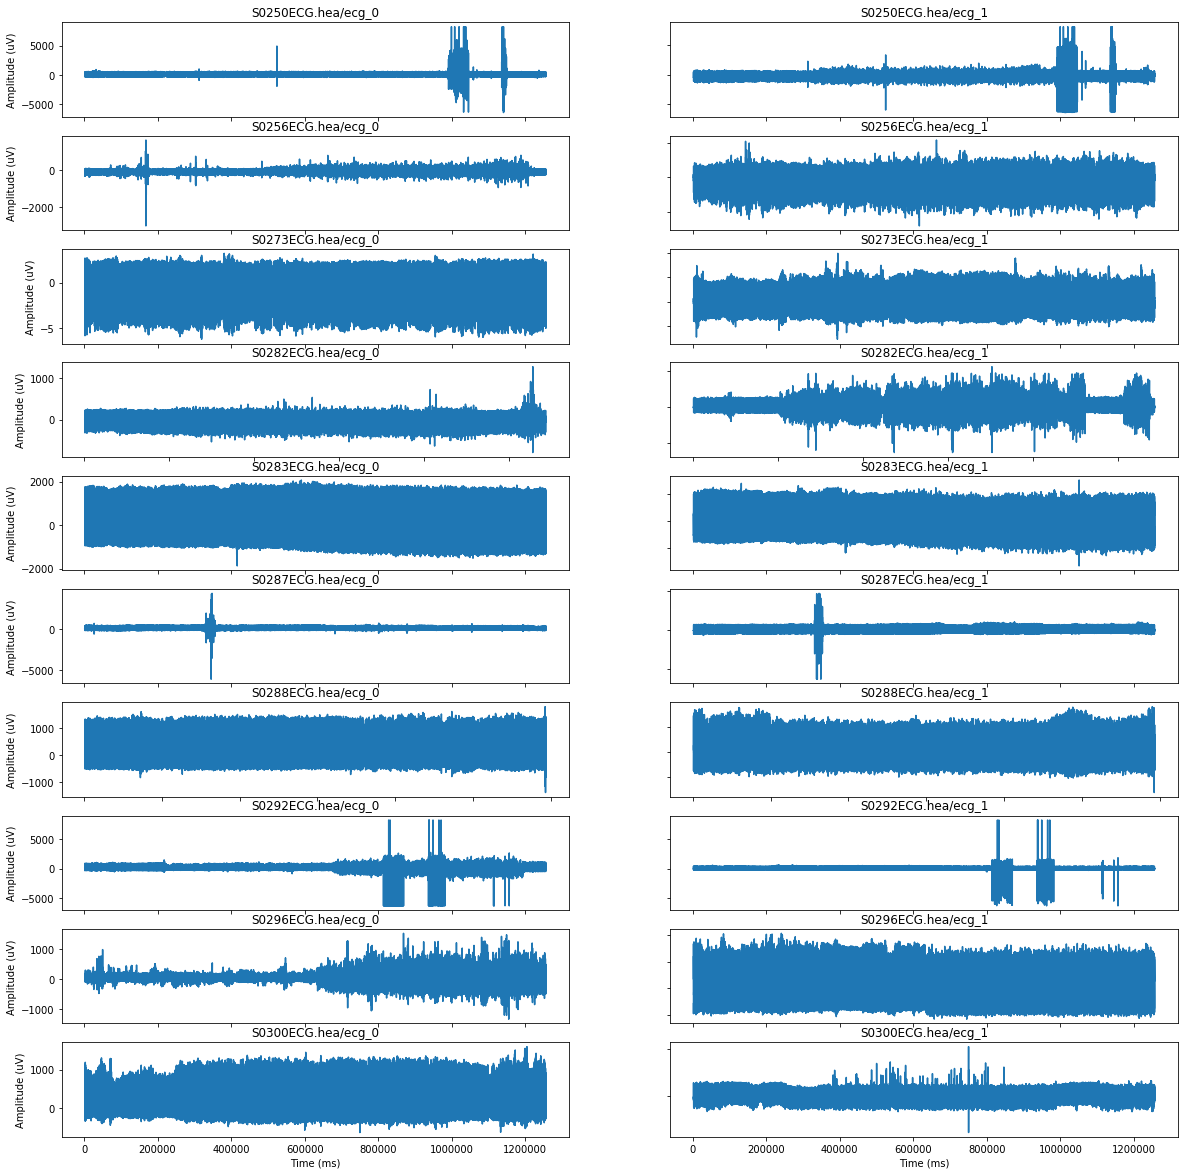

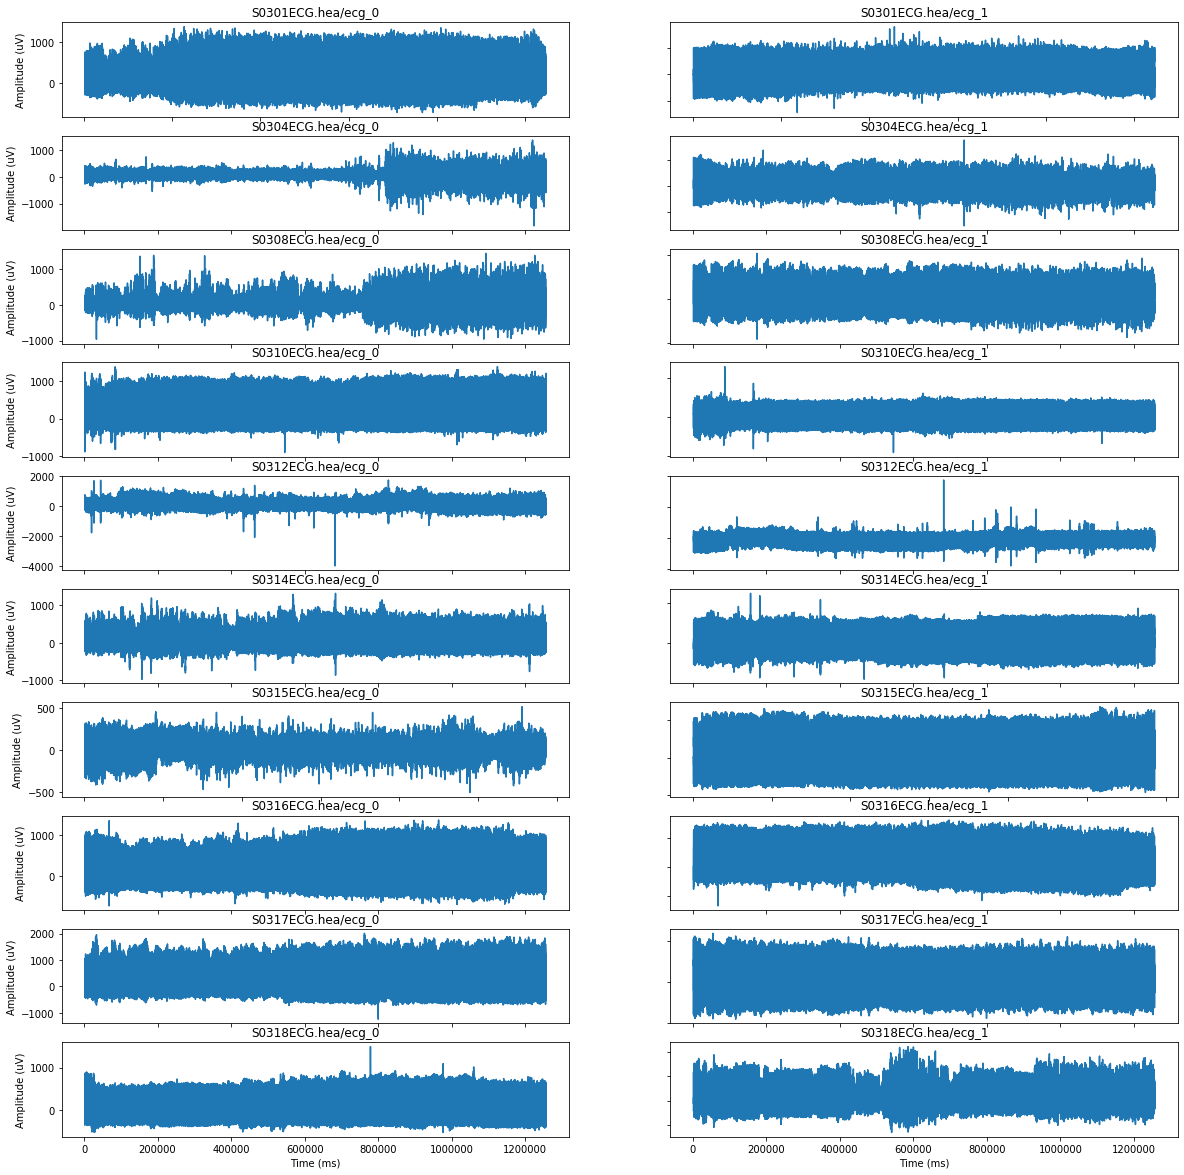

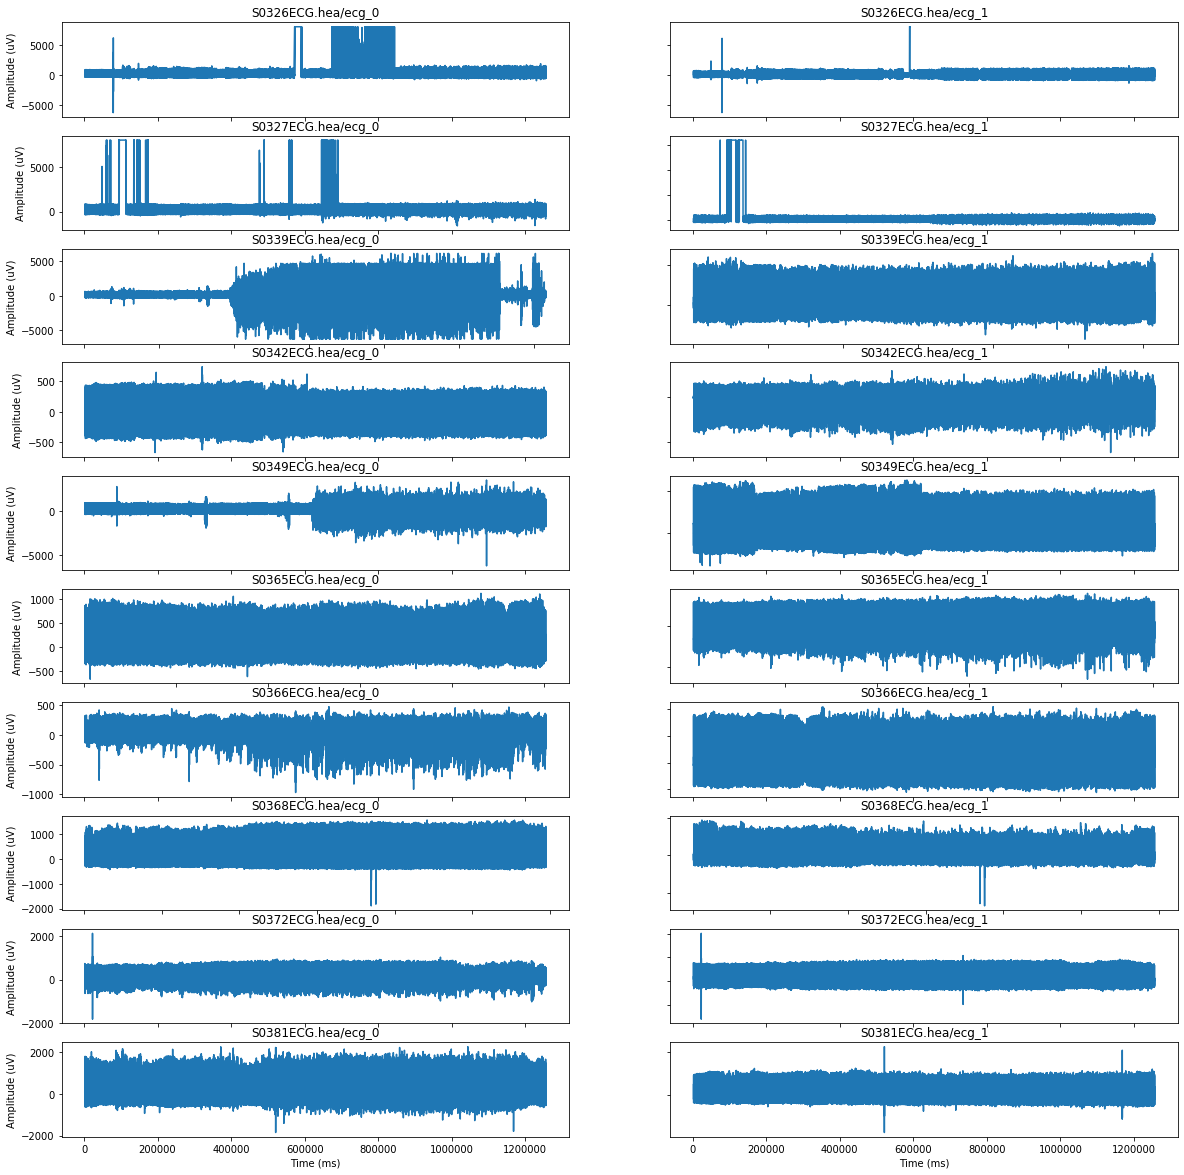

In [290]:
for j in range(3):
    fig, axs = plt.subplots(10, 2)
    fig.set_size_inches(20, 20.5)

    for i in range(10):
        axs[i, 0].plot(df_ecg.iloc[:,i*2+j*20])
        axs[i, 0].set_title(df_ecg.columns[i*2+j*20])
        axs[i, 1].plot(df_ecg.iloc[:,i*2+1+j*20])
        axs[i, 1].set_title(df_ecg.columns[i*2+1+j*20])

    for ax in axs.flat:
        ax.set(xlabel='Time (ms)', ylabel='Amplitude (uV)')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    fig.savefig('all_small_plots'+ str(j) + '.png', dpi=100)

### Identifying artifacts

In [5]:
# Storing artifacts in a csv file
df_new = pd.DataFrame()
df_new['Saturation_1'] = df_ecg["S0411ECG.hea/ecg_0"][200000: 202000].reset_index(drop=True)
df_new['Saturation_2'] = df_ecg["S0411ECG.hea/ecg_1"][200000: 202000].reset_index(drop=True)
df_new['Motion_1'] = df_ecg["S0282ECG.hea/ecg_0"][300000: 302000].reset_index(drop=True)
df_new['Motion_2'] = df_ecg["S0282ECG.hea/ecg_1"][300000: 302000].reset_index(drop=True)
df_new['Baseline_1'] = df_ecg["S0283ECG.hea/ecg_0"][0: 2000].reset_index(drop=True)
df_new['Baseline_2'] = df_ecg["S0283ECG.hea/ecg_1"][0: 2000].reset_index(drop=True)
df_new['Interference_1'] = df_ecg["S0411ECG.hea/ecg_0"][798000: 800000].reset_index(drop=True)
df_new['Interference_2'] = df_ecg["S0411ECG.hea/ecg_0"][798000: 800000].reset_index(drop=True)
df_new['HF_Motion_1'] = df_ecg["S0411ECG.hea/ecg_0"][787000: 790000].reset_index(drop=True)
df_new['HF_Motion_2'] = df_ecg["S0411ECG.hea/ecg_1"][787000: 790000].reset_index(drop=True)
df_new['Noise_1'] = df_ecg["S0296ECG.hea/ecg_0"][4000: 6000].reset_index(drop=True)
df_new['Nose_2'] = df_ecg["S0296ECG.hea/ecg_1"][4000: 6000].reset_index(drop=True)

df_new.to_csv("./database/new_ecg_data/artefacts.csv", index = False)

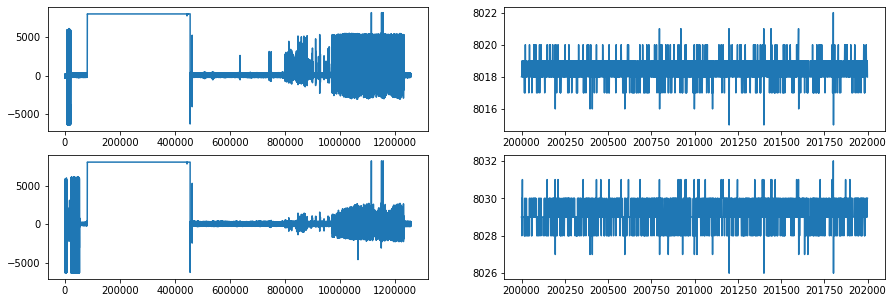

In [29]:
### SATURATION ###

# As seen in Control S0411
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 5)
axs[0,0].plot(df_ecg["S0411ECG.hea/ecg_0"])
axs[0,1].plot(df_ecg["S0411ECG.hea/ecg_0"][200000: 202000])
axs[1,0].plot(df_ecg["S0411ECG.hea/ecg_1"])
axs[1,1].plot(df_ecg["S0411ECG.hea/ecg_1"][200000: 202000])

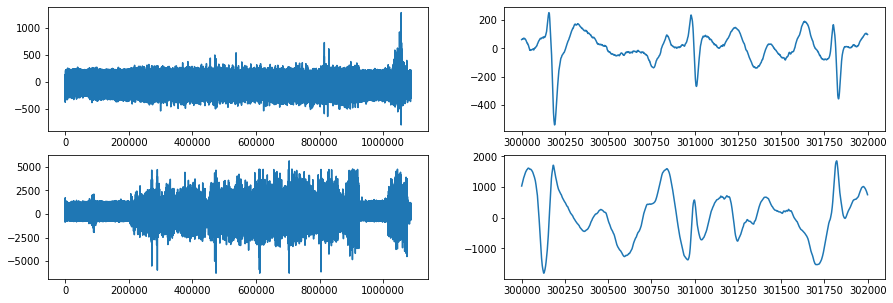

In [30]:
### MOTION ARTEFACTS ###

# As seen in Diabetic S0282
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 5)
axs[0,0].plot(df_ecg["S0282ECG.hea/ecg_0"])
axs[0,1].plot(df_ecg["S0282ECG.hea/ecg_0"][300000: 302000])
axs[1,0].plot(df_ecg["S0282ECG.hea/ecg_1"])
axs[1,1].plot(df_ecg["S0282ECG.hea/ecg_1"][300000: 302000])

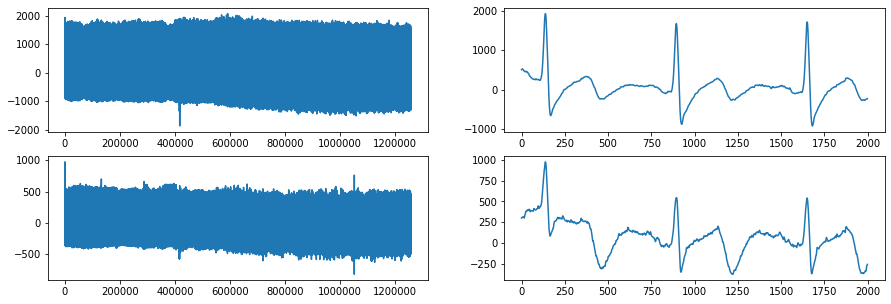

In [32]:
### BASELINE WANDER ###
# As seen control S0283
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 5)
axs[0,0].plot(df_ecg["S0283ECG.hea/ecg_0"])
axs[0,1].plot(df_ecg["S0283ECG.hea/ecg_0"][0: 2000])
axs[1,0].plot(df_ecg["S0283ECG.hea/ecg_1"])
axs[1,1].plot(df_ecg["S0283ECG.hea/ecg_1"][0: 2000])

#Shouldn't affect the PT algorithm, notice that ecg_1 has more AC noise but that will be filtered out later

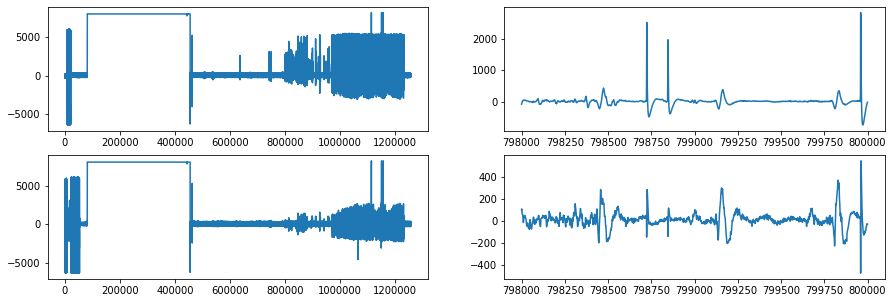

In [35]:
### INTERFERENCE ###
# As seen in Control S0411
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 5)
axs[0,0].plot(df_ecg["S0411ECG.hea/ecg_0"])
axs[0,1].plot(df_ecg["S0411ECG.hea/ecg_0"][798000: 800000])
axs[1,0].plot(df_ecg["S0411ECG.hea/ecg_1"])
axs[1,1].plot(df_ecg["S0411ECG.hea/ecg_1"][798000: 800000])

# could also be saturation, but unlike previous saturation doesn't exhibit ADC clipping
#...will definitely affect PT algorithm

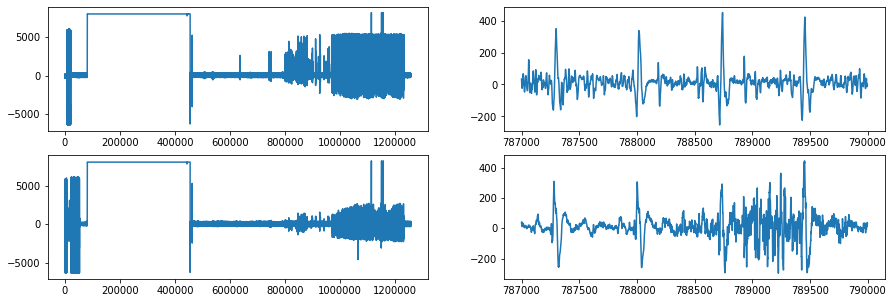

In [34]:
### HIGH FREQUENCY MOTION ARTIFACTS ###
# As seen in Control S0411
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 5)
axs[0,0].plot(df_ecg["S0411ECG.hea/ecg_0"])
axs[0,1].plot(df_ecg["S0411ECG.hea/ecg_0"][787000: 790000])
axs[1,0].plot(df_ecg["S0411ECG.hea/ecg_1"])
axs[1,1].plot(df_ecg["S0411ECG.hea/ecg_1"][787000: 790000])

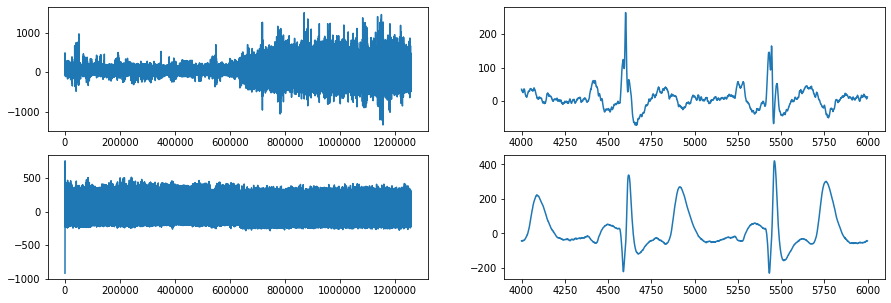

In [41]:
### NOISE ###

# As seen in S0296
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 5)
axs[0,0].plot(df_ecg["S0296ECG.hea/ecg_0"])
axs[0,1].plot(df_ecg["S0296ECG.hea/ecg_0"][4000: 6000])
axs[1,0].plot(df_ecg["S0296ECG.hea/ecg_1"])
axs[1,1].plot(df_ecg["S0296ECG.hea/ecg_1"][4000: 6000])

# Hopefully the band-pass filter catches this

### Visualising certain signals

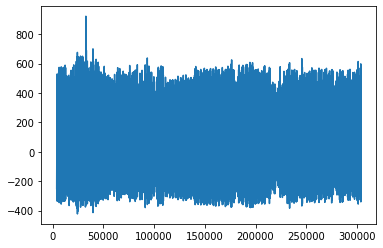

In [151]:
### ??? ### 
#df_ecg["S0250ECG.hea/ecg_0"].plot()
#df_ecg["S0250ECG.hea/ecg_1"].plot()

df_ecg["S0250ECG.hea/ecg_0"][2000:302000].plot()
#df_ecg["S0250ECG.hea/ecg_1"][2000:302000].plot()
#plt.hold(True)

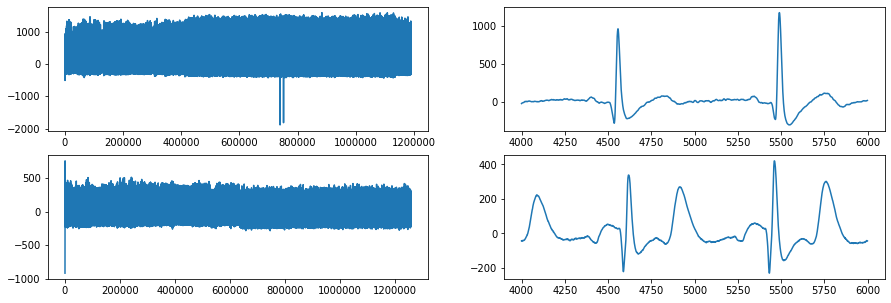

In [42]:
### AMPLITUDE COMPARISON ###
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 5)
axs[0,0].plot(df_ecg["S0368ECG.hea/ecg_0"])
axs[0,1].plot(df_ecg["S0368ECG.hea/ecg_0"][4000: 6000])
axs[1,0].plot(df_ecg["S0296ECG.hea/ecg_1"])
axs[1,1].plot(df_ecg["S0296ECG.hea/ecg_1"][4000: 6000])

# Widely different peak amplitudes depending on sample, shouldn't just smack on a threshold and call it a day

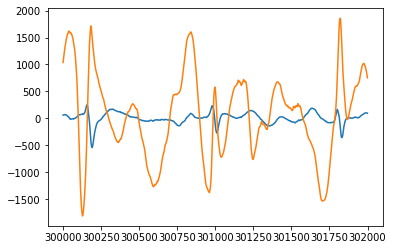

In [15]:
# Diabetic #2
df_ecg["S0282ECG.hea/ecg_0"][300000:302000].plot()
df_ecg["S0282ECG.hea/ecg_1"][300000:302000].plot()

#df_ecg["S0282ECG.hea/ecg_0"].plot()
#df_ecg["S0282ECG.hea/ecg_1"].plot()

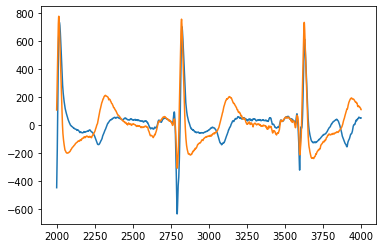

In [9]:
# Diabetic #3
df_ecg["S0372ECG.hea/ecg_0"][2000:4000].plot()
df_ecg["S0372ECG.hea/ecg_1"][2000:4000].plot()

#df_ecg["S0372ECG.hea/ecg_0"].plot()
#df_ecg["S0372ECG.hea/ecg_1"].plot()

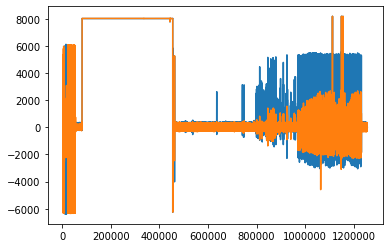

In [243]:
# Unstable Control #2 
#df_ecg["S0411ECG.hea/ecg_0"][0:2000].plot()
#df_ecg["S0411ECG.hea/ecg_1"][0:2000].plot()

df_ecg["S0411ECG.hea/ecg_0"].plot()
df_ecg["S0411ECG.hea/ecg_1"].plot()

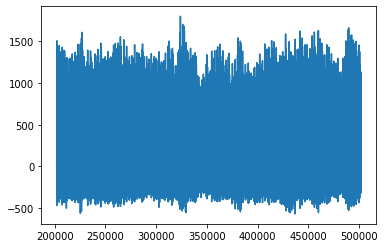

In [154]:
# Control #2
df_ecg["S0317ECG.hea/ecg_0"][200000:500000].plot()
#df_ecg["S0317ECG.hea/ecg_1"][200000:210000].plot()

#df_ecg["S0317ECG.hea/ecg_0"].plot()
#df_ecg["S0317ECG.hea/ecg_1"].plot()

## Saving new databases

### Applying filters

In [5]:
#Importing relevant packages
from scipy import signal
from scipy.signal import butter, filtfilt #For applying the filters
from scipy.fft import fft, fftfreq, ifft #For fast fourier transform

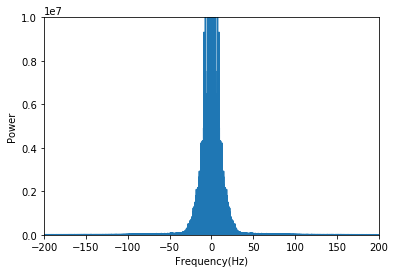

In [9]:
# Plotting frequency spectra of ECG signal
fs = 1000
ecg_signal = np.array(df_ecg["S0317ECG.hea/ecg_1"].dropna())
y = fft(ecg_signal)
freqs = fftfreq(len(ecg_signal), (1/fs))

plt.plot(freqs, np.abs(y))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Power')
plt.axis([-200, 200, 0, 10000000])
plt.show()

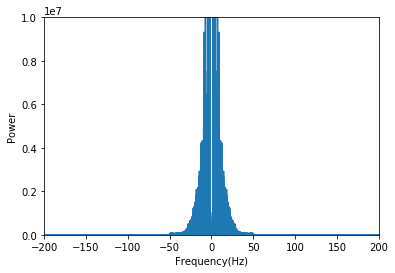

In [10]:
# Zero frequencies that are outside of the cutoff frequencies
high_cut = (np.abs(freqs) > 50)
low_cut = (np.abs(freqs) < 1)
y[high_cut] = 0
y[low_cut] = 0

# Plot resulting frequency diagram
plt.plot(freqs, np.abs(y))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Power')
plt.axis([-200, 200, 0, 10000000])
plt.show()

# Back to original signal using inverse fast fourier transform
filter_signal = ifft(y)

C:\Users\thefr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


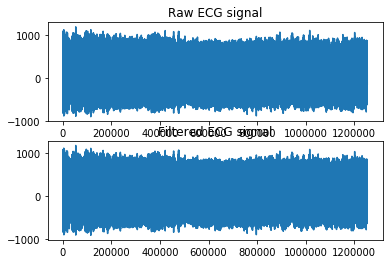

In [11]:
#Comparing filtered and unfiltered signals
ax1 = plt.subplot(211)
plt.plot(ecg_signal)
ax1.set_title("Raw ECG signal")


ax2 = plt.subplot(212)
plt.plot(filter_signal)
ax2.set_title("Filtered ECG signal")
plt.show()

C:\Users\thefr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


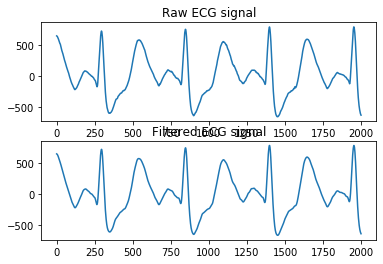

In [12]:
ax1 = plt.subplot(211)
plt.plot(ecg_signal[800000:802000])
ax1.set_title("Raw ECG signal")

ax2 = plt.subplot(212)
plt.plot(filter_signal[800000:802000])
ax2.set_title("Filtered ECG signal")
plt.show()


### Cleaning areas with moving averages that are out of bounds

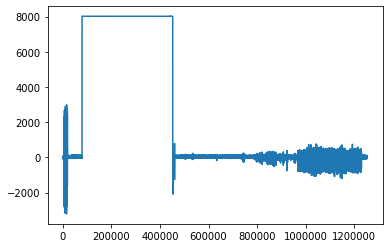

In [123]:
#Rolling window of means, with window size 50
N = 50
means = df_ecg["S0411ECG.hea/ecg_0"].rolling(window=N).mean().iloc[N-1:].values
plt.plot(means)

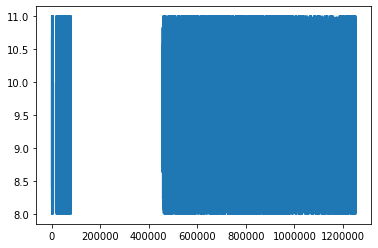

In [131]:
df = df_ecg["S0411ECG.hea/ecg_0"]
for m in range(1254327):
    if means[m] < 8 or means[m] > 11:
        means[m] = np.nan
        df[m] = np.nan
plt.plot(means)

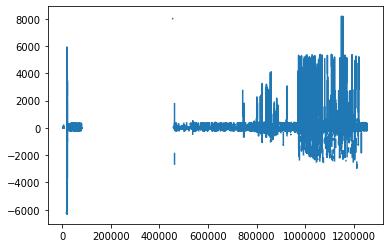

In [132]:
df_ecg["S0411ECG.hea/ecg_0"].plot()

## Extracting data

Tried out a couple of methods:
1. Applying threshold to amplitude
2. Applying moving window of means with threshold
3. Same moving window as in 2, but with a smaller window within to double check means...

### Just 5 minutes of data selected by eye for initial data processing

In [4]:
df_new = pd.DataFrame()
df_new['Control'] = df_ecg["S0283ECG.hea/ecg_0"][2000:302000].reset_index(drop=True)
df_new['Diabetic_1'] = df_ecg["S0283ECG.hea/ecg_0"][200000:500000].reset_index(drop=True)
df_new['Diabetic_2'] = df_ecg["S0283ECG.hea/ecg_0"][250000:550000].reset_index(drop=True)
df_new.to_csv("./database/new_ecg_data/small_sample.csv", index = False)

### Visualising the data to be extracted

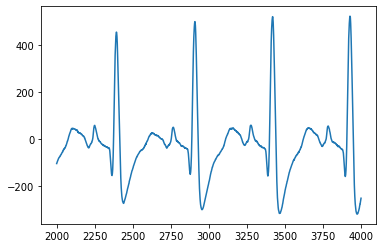

In [10]:
# Testing that the data looks ok
#df_ecg["S0250ECG.hea/ecg_0"].plot()
#df_ecg["S0250ECG.hea/ecg_1"].plot()

df_ecg["S0250ECG.hea/ecg_0"][2000:4000].plot()
#df_ecg["S0283ECG.hea/ecg_0"][2000:302000].plot()
#df_ecg["S0250ECG.hea/ecg_1"][2000:302000].plot()

In [25]:
### Finding 'clean' windows within the signals and saving them into the new dataframe ###
col = [x[:-6] for x in df_ecg.columns] #Want the reference table to treat the two leads as 1 sample
col = col[::2]
df_new = pd.DataFrame() #Dataframe for new signals to be saved into
df_ref = pd.DataFrame(index = ['C/D', 'Window 1', 'Window 2', 'Window 3', 'Window 4'], columns = col) #Reference table for information about the signal
N = 300000 #5 minute window

## Removing values past a certain threshold ##
#for col in df_ecg.columns:
#    df_ecg[col].values[df_ecg[col].values > 1000] = np.nan

## Extracting 'clean' windows' ##
for i in range(int(len(df_ecg.columns)/2)): #Want to get every 2nd column (as there are 2 signals per sample)
    pos = 0 #Current position in signal
    posprev = 0
    sig = df_ecg.iloc[:,(i*2)]
    sig2 = df_ecg.iloc[:,(i*2)+1]
    print("\n Now searching signal " + col[i])
    #means = sig.rolling(window=N).mean().iloc[N-1:].values
    #means2 = sig2.rolling(window=N).mean().iloc[N-1:].values
    
    for count in range(4): # section number, looking for 4 sections in this case
        print("On count number " + str(count))
        #for j in range(pos, len(means)):
            #if (means[j].mean() > 7 and means[j].mean() < 11) and (means2[j].mean() > 7 and means2[j].mean() < 11):
        posprev = pos
        for j in range(pos, len(sig), N):
            if (max(sig[j:j+N]) < 8000) and (max(sig2[j:j+N]) < 8000):
                print(max(sig[j:j+N]), max(sig2[j:j+N]))
                pos = j+N
                print("Found a window ending at " + str(pos))
                df_ref.iloc[count+1,i] = j
                df_new[df_ecg.columns[(i*2)] + '/' + str(count)] = sig[j:pos].reset_index(drop=True)
                df_new[df_ecg.columns[(i*2)+1] + '/' + str(count)] = sig2[j:pos].reset_index(drop=True)
                break
        if pos == posprev:
            print("no more clean sections found")
            break
            

# Saved to two new csvs
df_new.to_csv("./database/new_ecg_data/unclean.csv", index = False)
df_ref.to_csv("./database/new_ecg_data/unclean_ref.csv")
                


 Now searching signal S0250ECG.hea
On count number 0
922.0 846.0
Found a window ending at 300000
On count number 1
4906.0 3377.0
Found a window ending at 600000
On count number 2
715.0 1967.0
Found a window ending at 900000
On count number 3
801.0 1640.0
Found a window ending at 1500000

 Now searching signal S0256ECG.hea
On count number 0
1610.0 2086.0
Found a window ending at 300000
On count number 1
741.0 1463.0
Found a window ending at 600000
On count number 2
787.0 2161.0
Found a window ending at 900000
On count number 3
791.0 1539.0
Found a window ending at 1200000

 Now searching signal S0273ECG.hea
On count number 0
2.99 7.36
Found a window ending at 300000
On count number 1
3.22 9.85
Found a window ending at 600000
On count number 2
2.57 8.89
Found a window ending at 900000
On count number 3
2.99 7.3
Found a window ending at 1200000

 Now searching signal S0282ECG.hea
On count number 0
320.0 4702.0
Found a window ending at 300000
On count number 1
536.0 4643.0
Found a window 

2184.0 613.0
Found a window ending at 300000
On count number 1
2274.0 1112.0
Found a window ending at 600000
On count number 2
2241.0 602.0
Found a window ending at 900000
On count number 3
2281.0 1030.0
Found a window ending at 1200000

 Now searching signal S0382ECG.hea
On count number 0
2927.0 738.0
Found a window ending at 300000
On count number 1
1734.0 801.0
Found a window ending at 600000
On count number 2
no more clean sections found

 Now searching signal S0390ECG.hea
On count number 0
1015.0 1350.0
Found a window ending at 300000
On count number 1
1033.0 1258.0
Found a window ending at 600000
On count number 2
1010.0 1185.0
Found a window ending at 900000
On count number 3
1015.0 1374.0
Found a window ending at 1200000

 Now searching signal S0392ECG.hea
On count number 0
1401.0 745.0
Found a window ending at 300000
On count number 1
1176.0 499.0
Found a window ending at 600000
On count number 2
1432.0 790.0
Found a window ending at 900000
On count number 3
4860.0 840.0
Found

In [26]:
df_ref.head()

S0250ECG.hea S0256ECG.hea S0273ECG.hea S0282ECG.hea S0283ECG.hea  \
C/D               NaN          NaN          NaN          NaN          NaN   
Window 1            0            0            0            0            0   
Window 2       300000       300000       300000       300000       300000   
Window 3       600000       600000       600000       600000       600000   
Window 4      1200000       900000       900000       900000       900000   

         S0287ECG.hea S0288ECG.hea S0292ECG.hea S0296ECG.hea S0300ECG.hea  \
C/D               NaN          NaN          NaN          NaN          NaN   
Window 1            0            0            0            0            0   
Window 2       300000       300000       300000       300000       300000   
Window 3       600000       600000      1200000       600000       600000   
Window 4       900000       900000          NaN       900000       900000   

          ... S0381ECG.hea S0382ECG.hea S0390ECG.hea S0392ECG.hea  \
C/D       ...          NaN          NaN          NaN          NaN   
Window 1  ...            0            0            0            0   
Window 2  ...       300000       300000       300000       300000   
Window 3  ...       600000          NaN       600000       600000   
Window 4  ...       900000          NaN       900000       900000   

         S0398ECG.hea S0405ECG.hea S0406ECG.hea S0409ECG.hea S0411ECG.hea  \
C/D               NaN          NaN          NaN          NaN          NaN   
Window 1            0            0            0            0       600000   
Window 2       300000       300000       300000       300000      1200000   
Window 3       600000       600000       600000       600000          NaN   
Window 4       900000       900000       900000       900000          NaN   

         S0424ECG.hea  
C/D               NaN  
Window 1            0  
Window 2       300000  
Window 3       600000  
Window 4          NaN  

[5 rows x 39 columns]

In [3]:
#Testing if the file can be opened
df_data = pd.read_csv('./database/new_ecg_data/unclean.csv', encoding = 'latin-1')

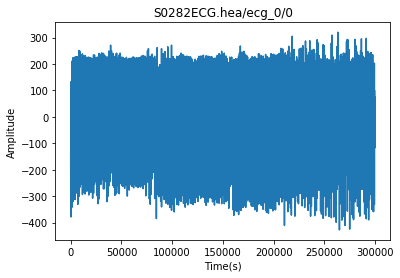

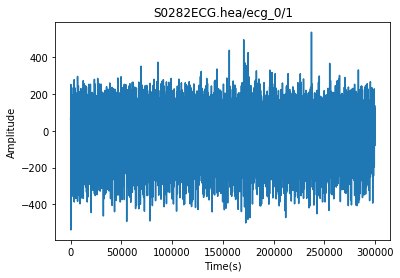

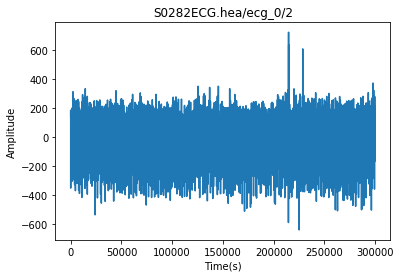

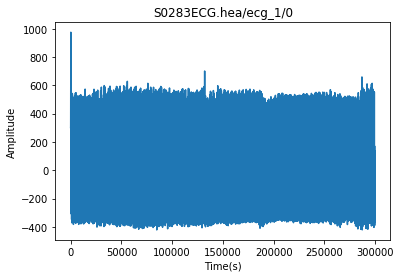

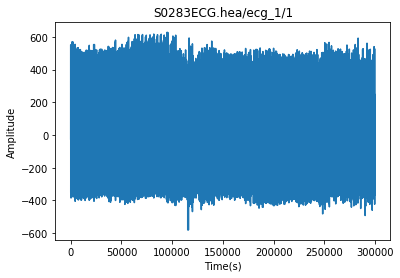

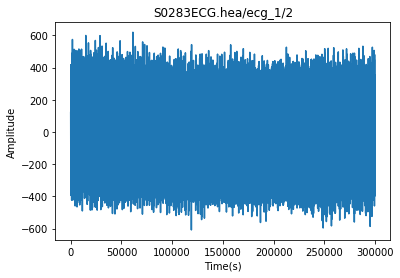

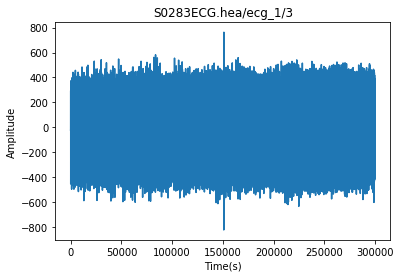

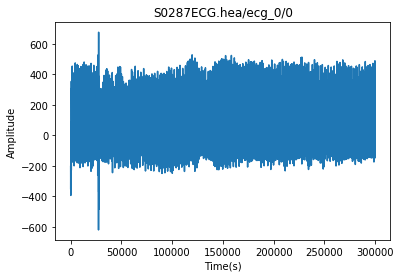

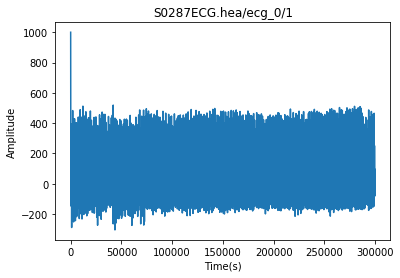

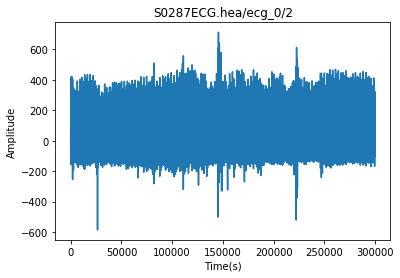

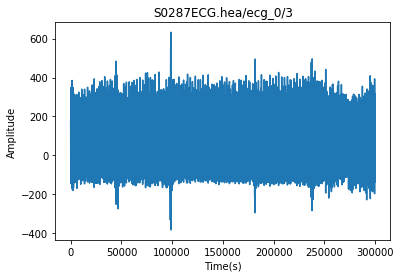

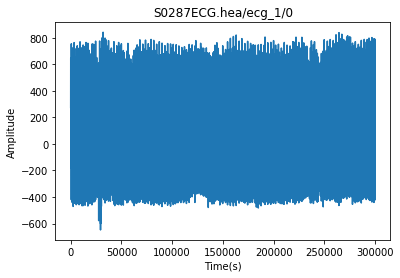

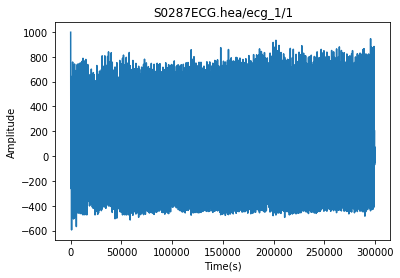

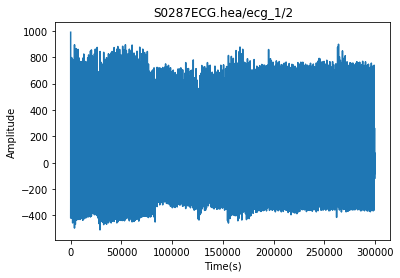

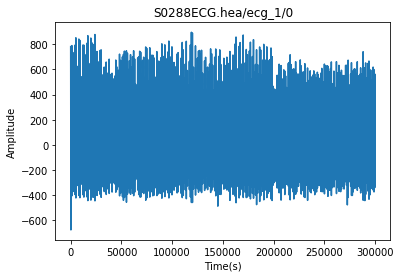

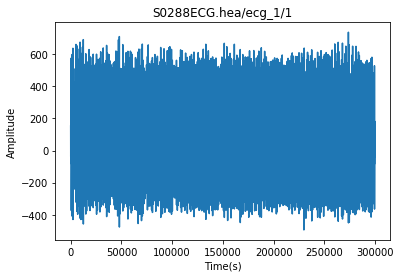

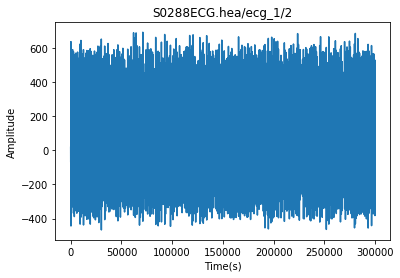

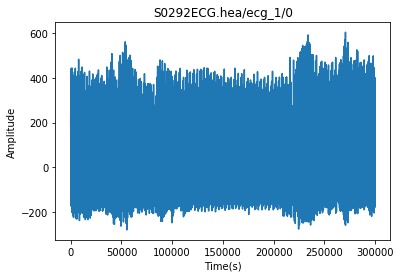

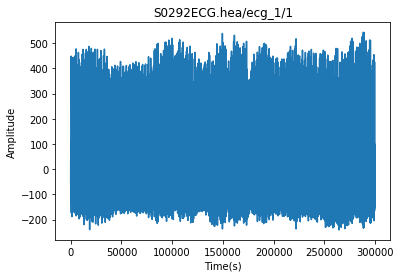

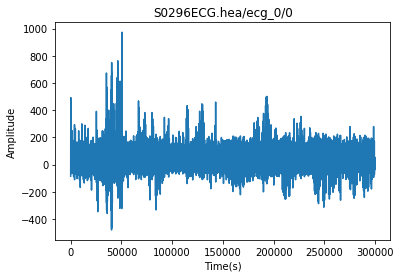

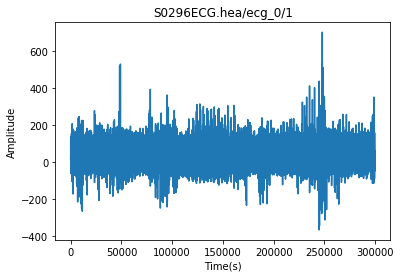

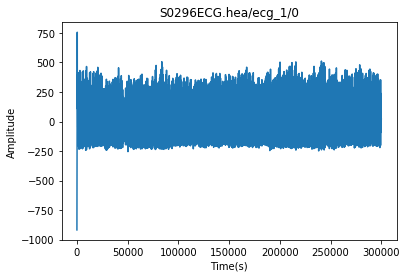

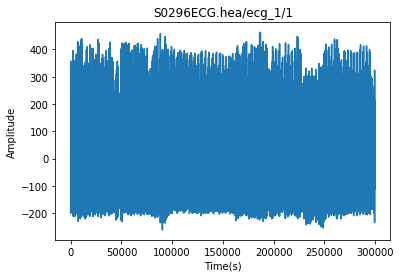

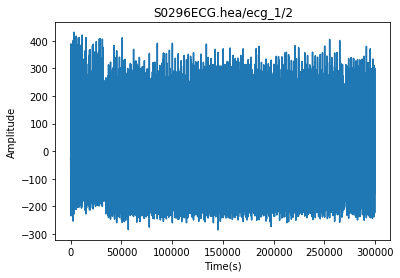

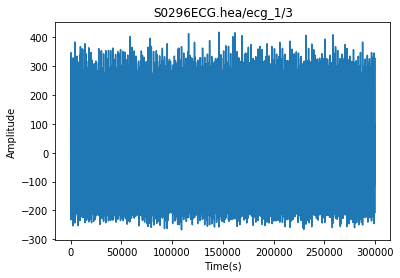

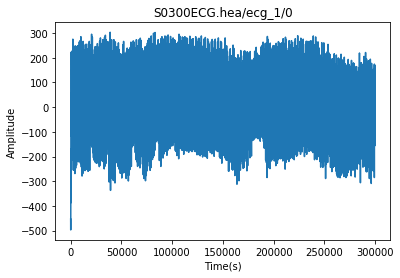

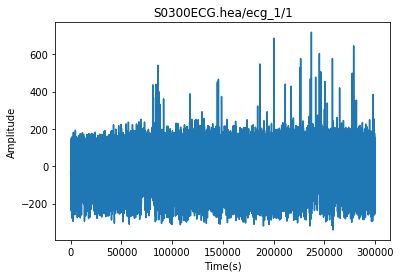

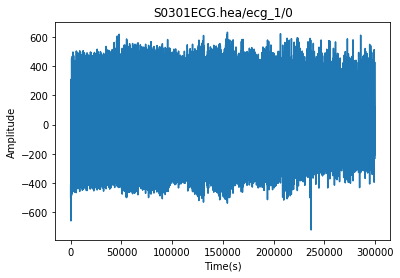

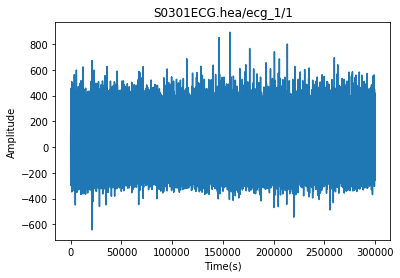

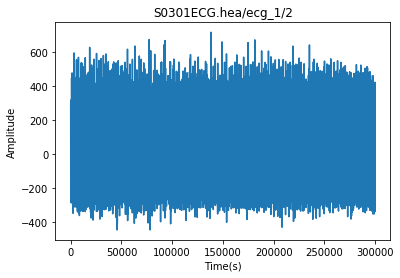

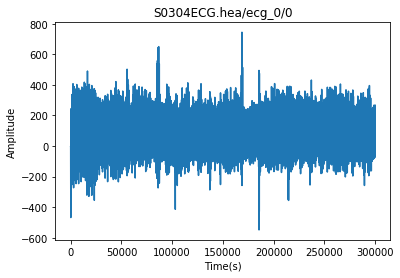

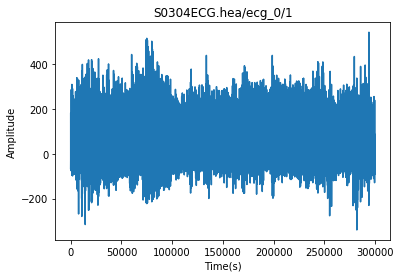

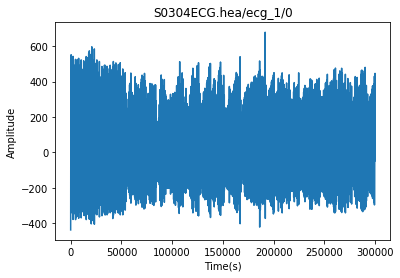

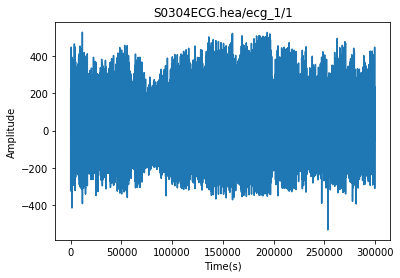

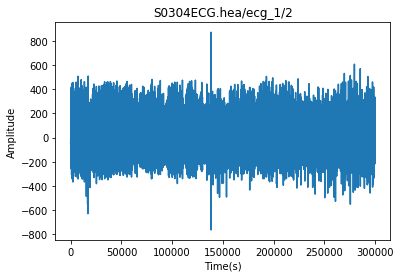

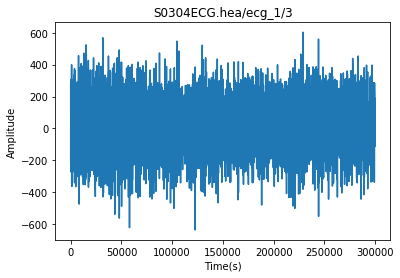

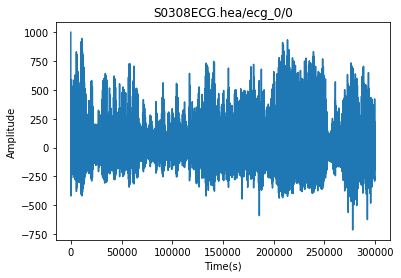

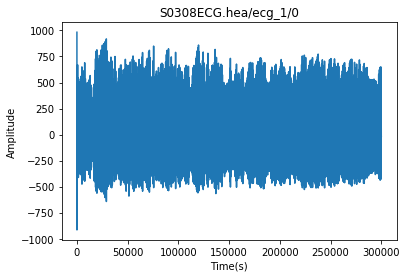

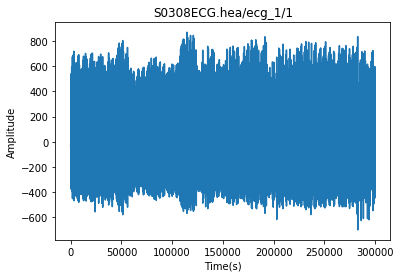

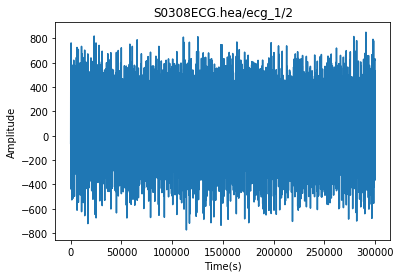

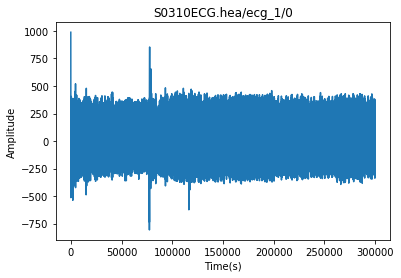

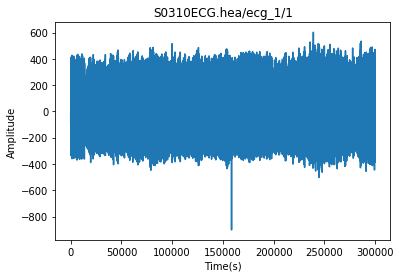

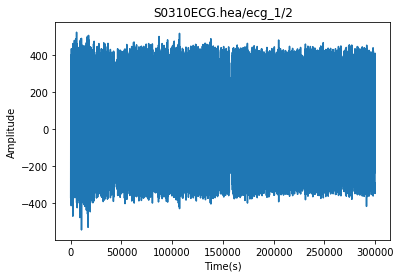

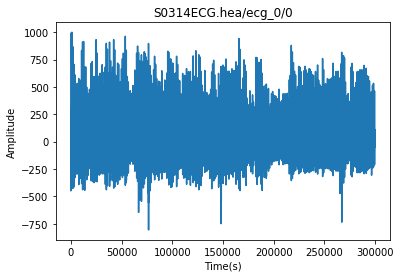

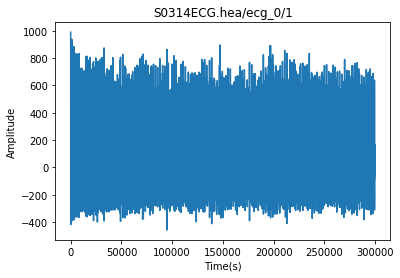

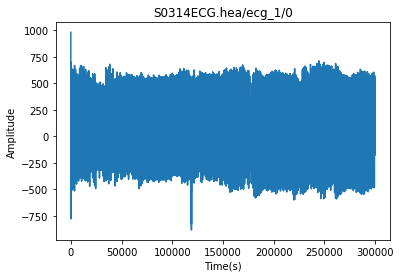

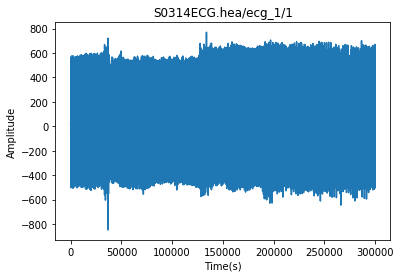

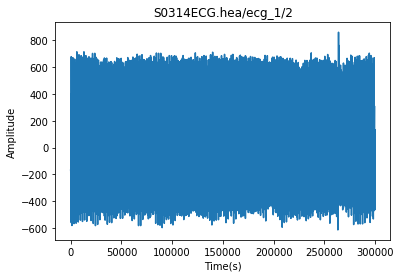

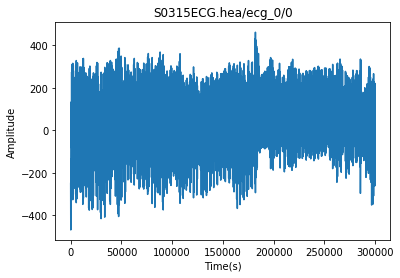

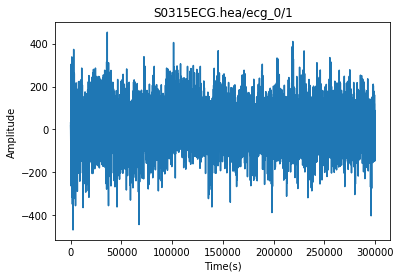

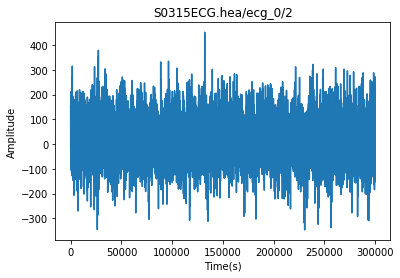

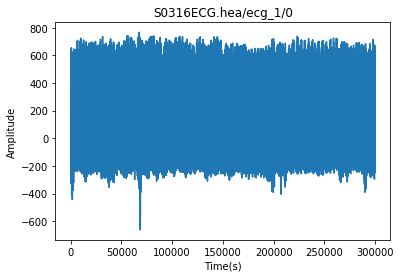

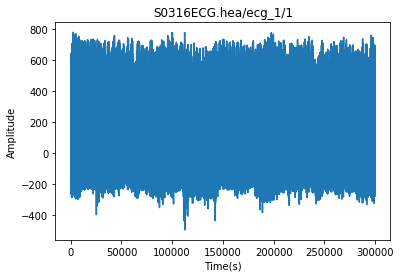

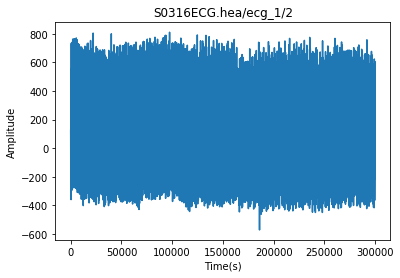

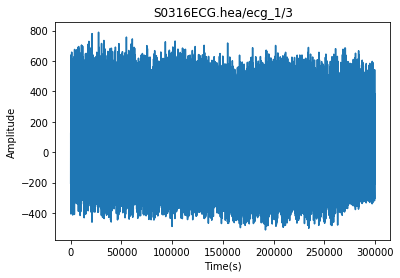

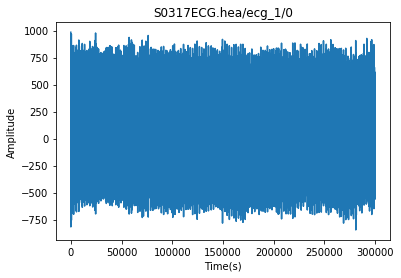

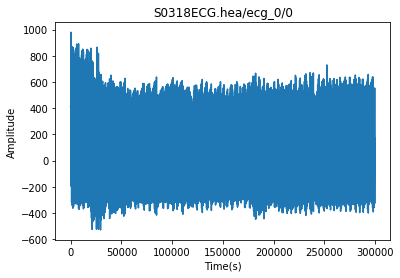

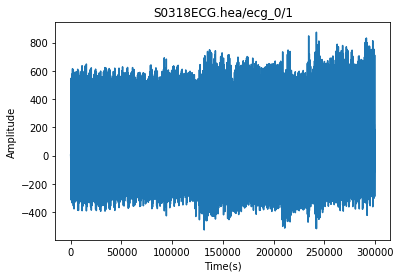

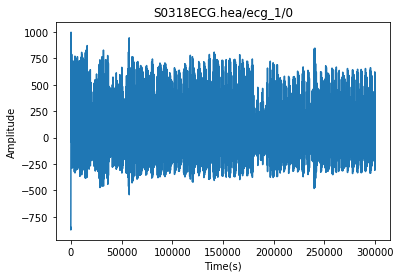

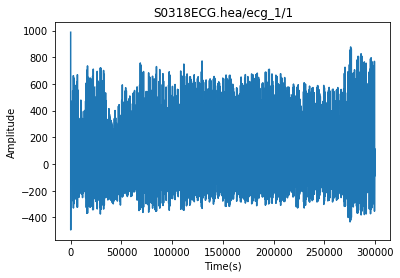

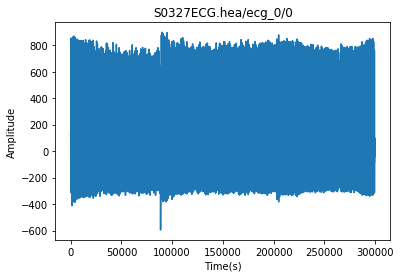

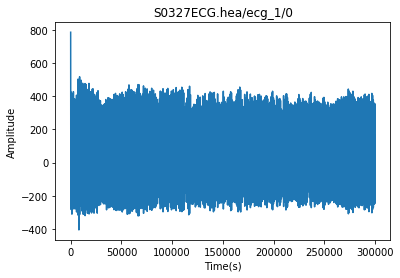

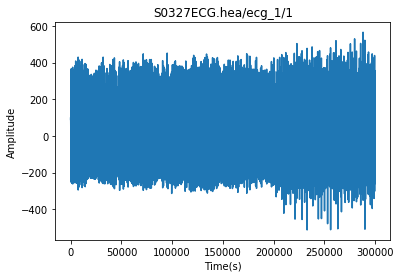

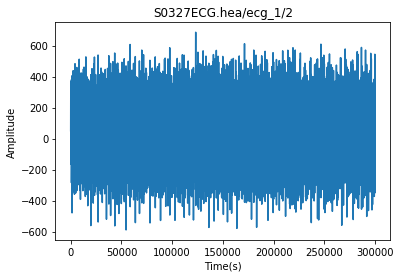

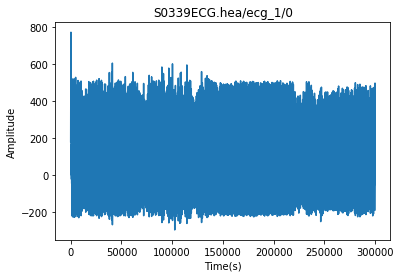

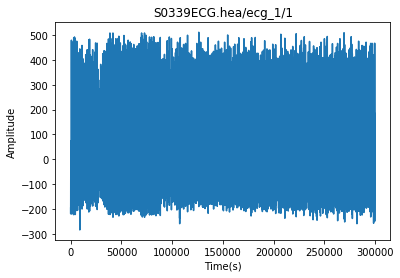

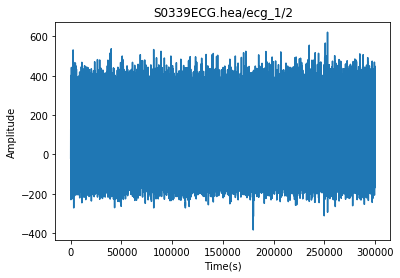

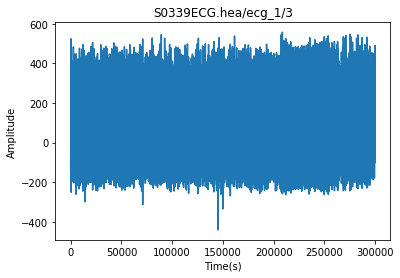

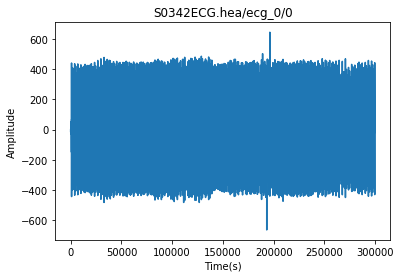

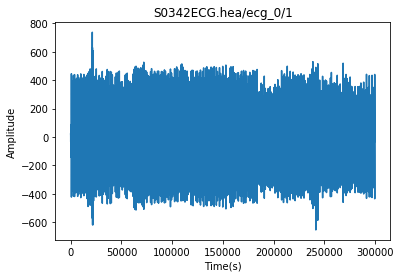

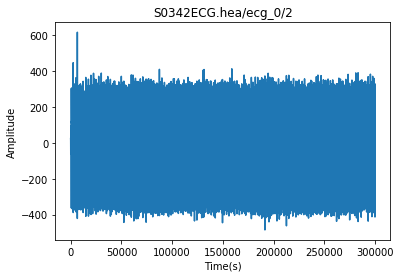

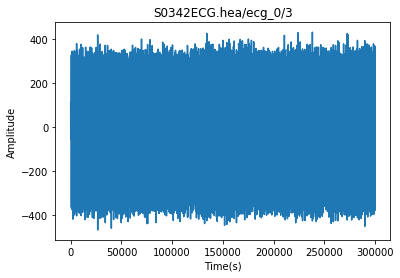

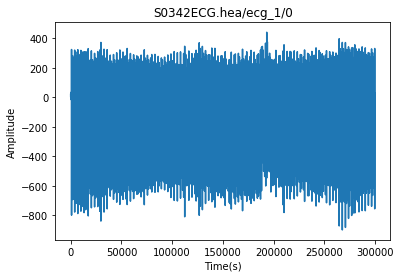

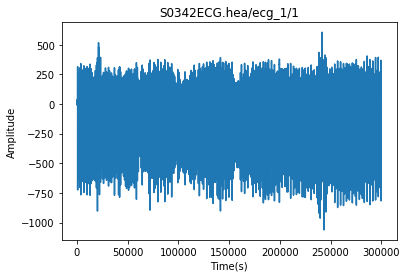

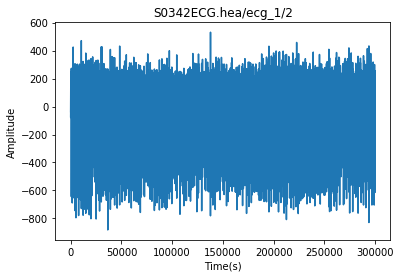

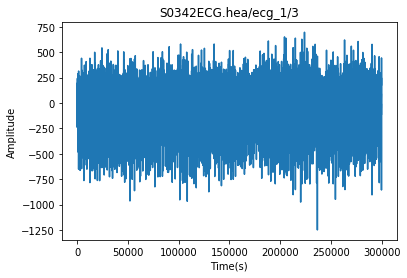

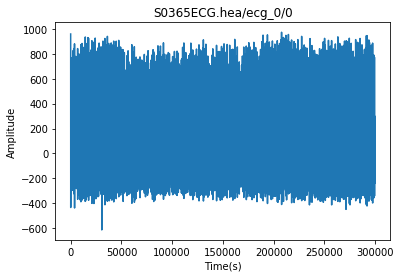

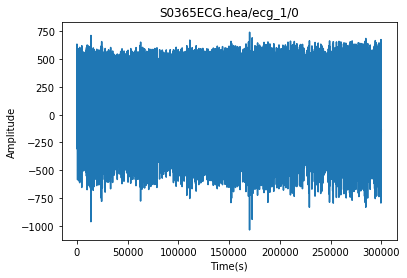

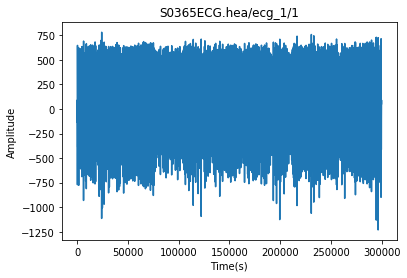

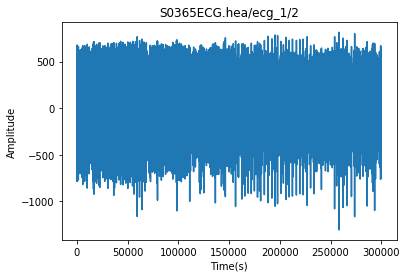

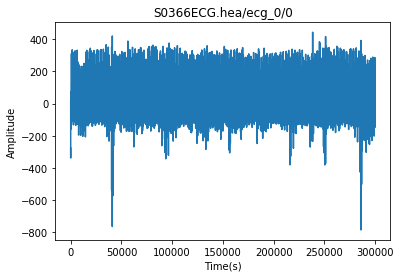

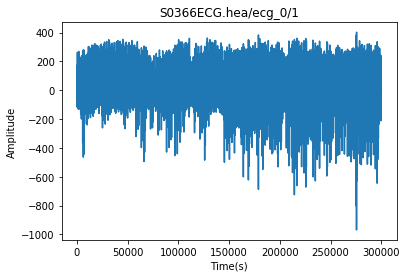

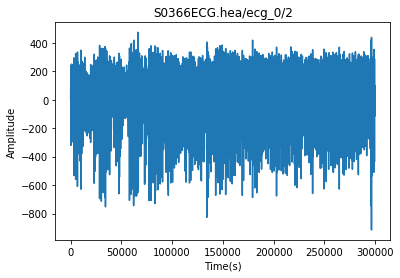

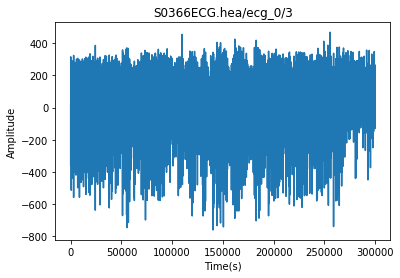

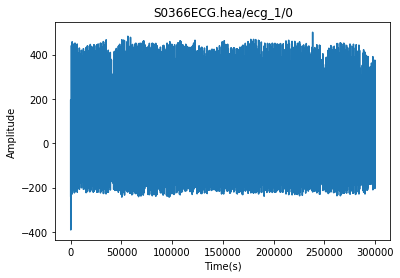

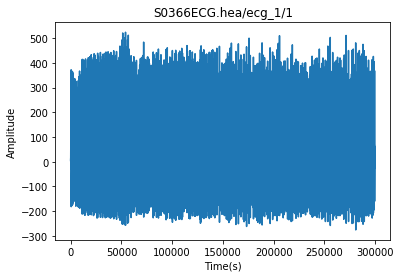

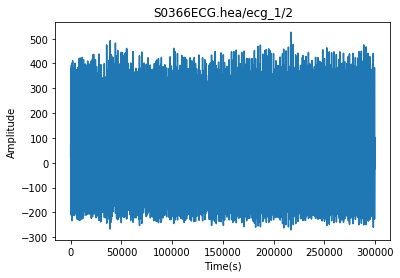

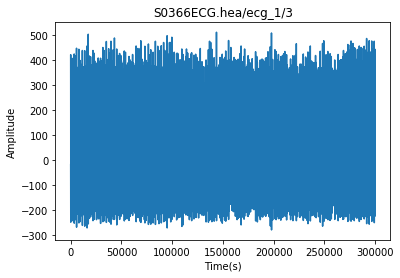

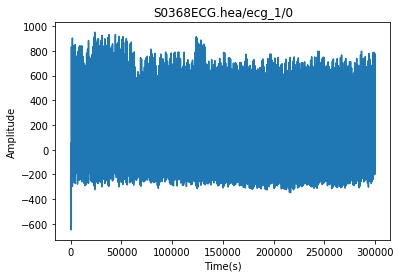

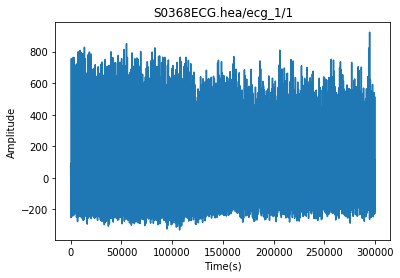

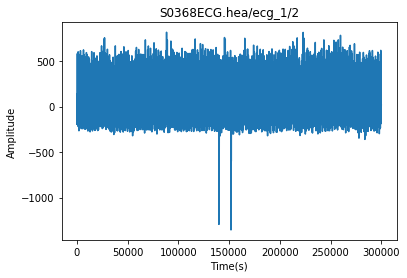

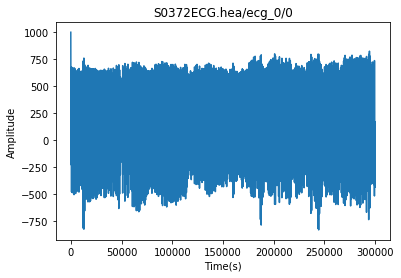

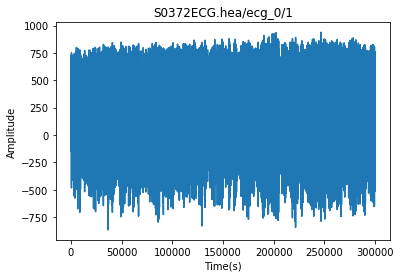

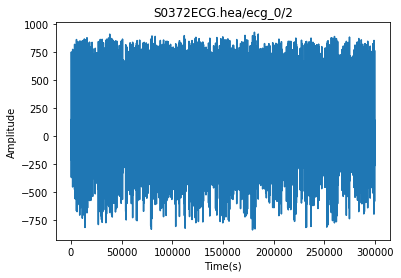

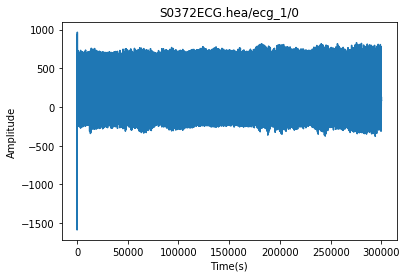

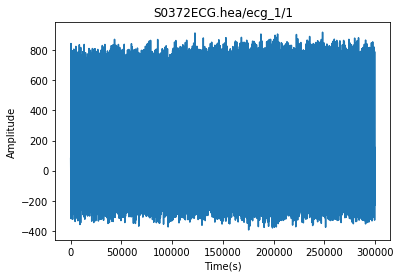

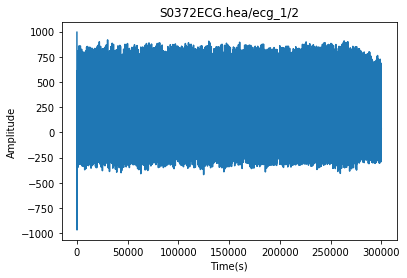

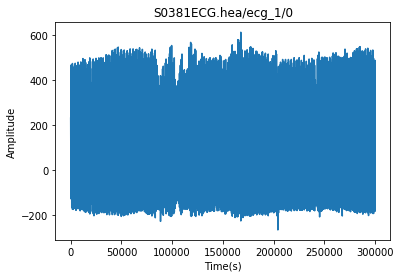

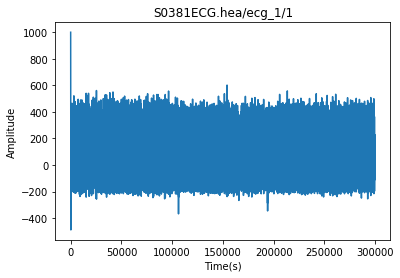

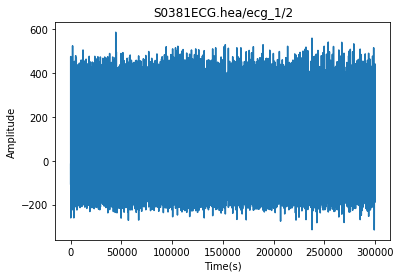

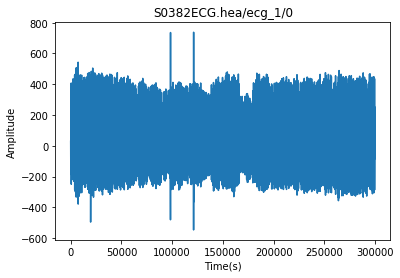

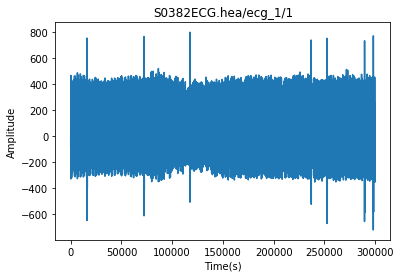

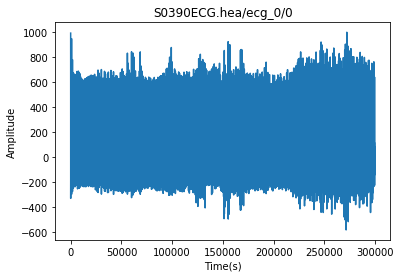

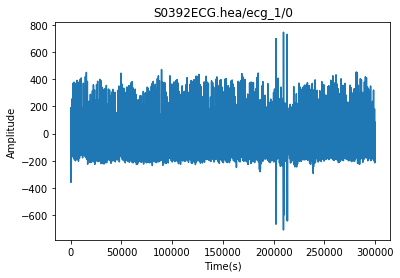

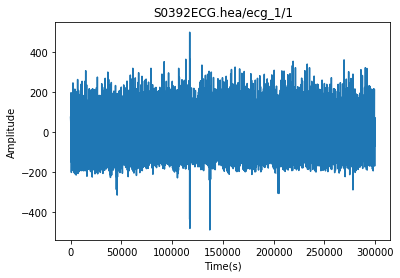

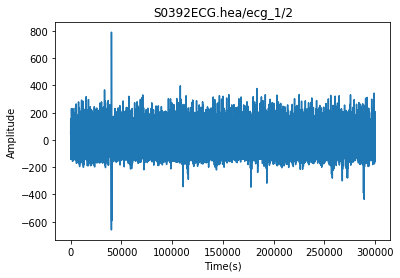

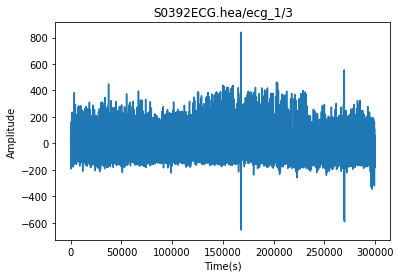

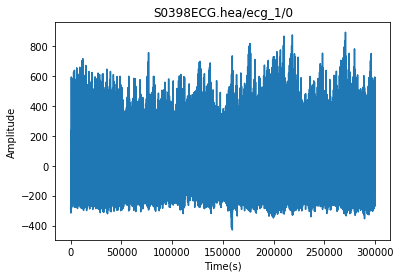

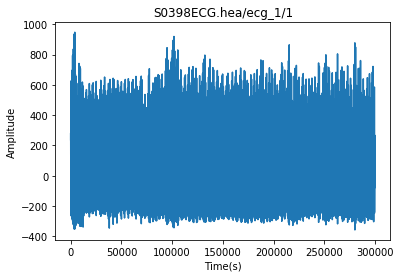

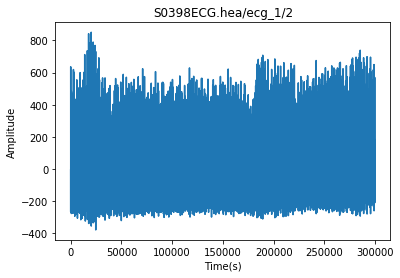

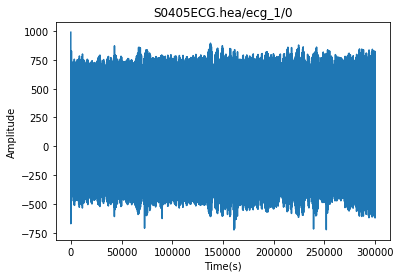

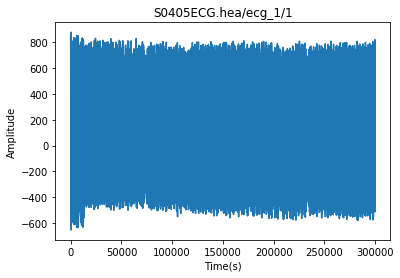

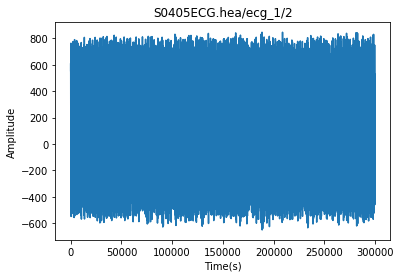

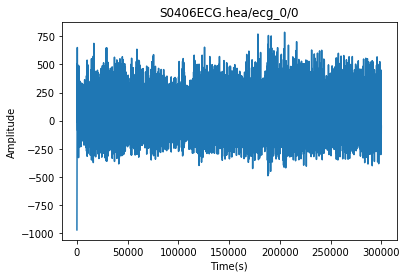

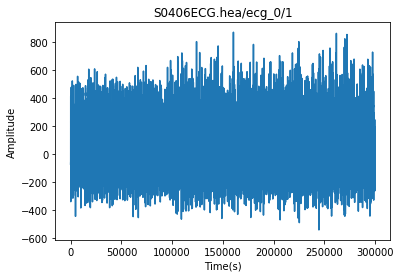

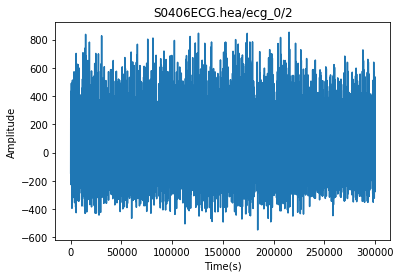

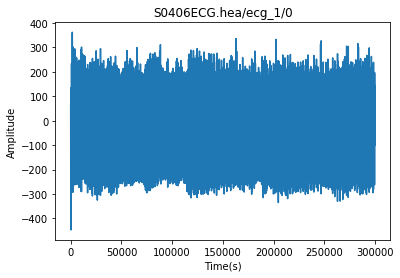

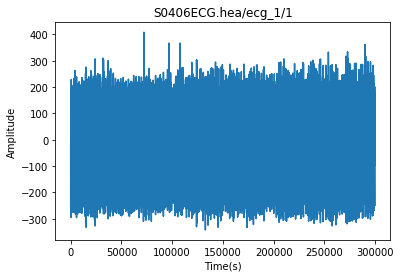

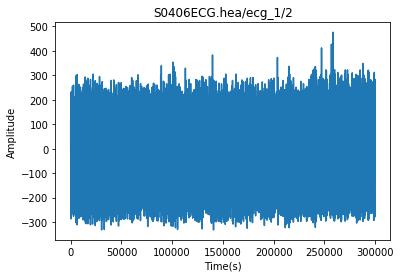

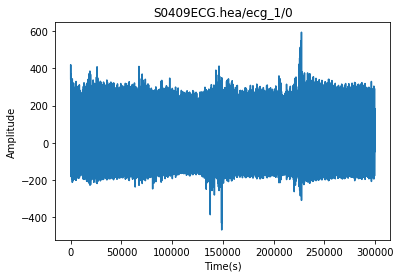

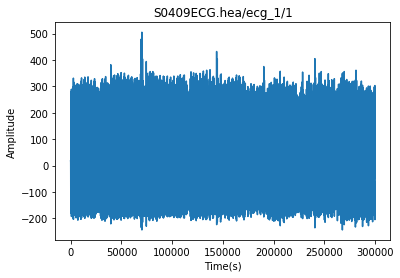

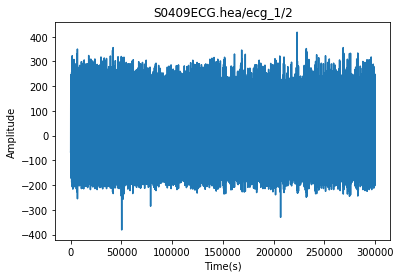

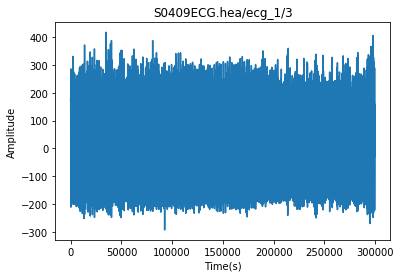

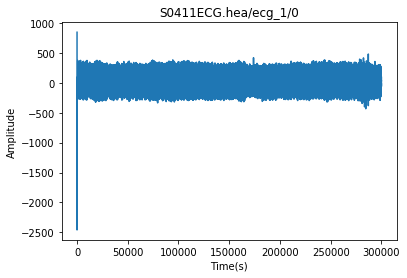

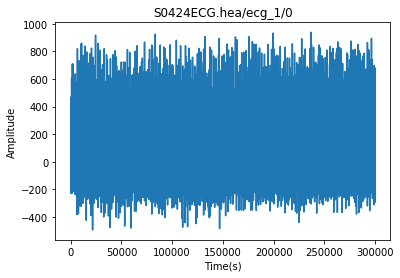

IndexError: index 126 is out of bounds for axis 0 with size 126

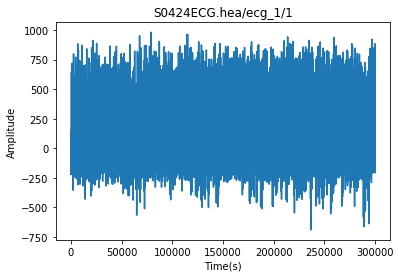

In [11]:
# Checking for bad data sets
i = 1
for column in df_new:
    plt.plot(df_new[column])
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude')
    plt.title(column)
    if column[0:-4] != df_new.columns[i]: #All the sections from the same signal in the same plot
        plt.show()
    i += 1